In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [5]:
#from google.colab import files
#uploaded = files.upload()

Univ = pd.read_csv("Universities.csv")
Univ.shape
Univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [5]:
# Normalization function # use sklearn library norm
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [6]:
def stand_func(i):
    x=(i-i.mean())/i.std()
    return x

In [8]:
# Normalized data frame (considering the numerical part of data)
df_norm = stand_func(Univ.iloc[:,1:])

In [9]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.401994,0.644235,-0.871888,0.068841,-0.324717,0.803729
1,1.370988,1.210256,-0.719814,-1.652182,2.508651,-0.631501
2,-0.059432,-0.745090,1.003685,-0.914600,-0.163745,-1.625123
3,0.401994,-0.024699,-0.770506,-0.177019,0.285756,0.141315
4,0.125139,0.335496,-0.314285,0.068841,-0.382949,0.362120
5,0.678850,0.644235,-0.821197,-0.668740,0.330956,0.914132
6,0.448137,0.695691,-0.466359,-0.177019,0.290956,0.914132
7,-0.105574,-0.127612,-0.770506,-0.177019,-0.503436,0.582924
8,1.232561,0.747148,-1.277417,-0.422880,0.841393,1.134936
9,0.355852,-0.076156,0.243318,-1.406321,2.170070,0.030913


In [10]:
np.round(df_norm.describe(),4)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.0000,25.0000,25.0000,25.0000,25.0000,25.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-2.4127,-2.4946,-1.2774,-1.6522,-1.2953,-2.1771
25%,-0.2440,-0.1276,-0.7705,-0.4229,-0.8491,-0.6315
50%,0.1713,0.2326,-0.1622,-0.1770,0.0114,0.3621
75%,0.6788,0.6957,0.5475,0.3147,0.5187,0.8037
max,1.3710,1.2103,2.5751,3.0192,2.5087,1.1349


In [6]:
help(sch.linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [8]:
from scipy.spatial.distance import pdist
help(pdist)

Help on function pdist in module scipy.spatial.distance:

pdist(X, metric='euclidean', *, out=None, **kwargs)
    Pairwise distances between observations in n-dimensional space.
    
    See Notes for common calling conventions.
    
    Parameters
    ----------
    X : array_like
        An m by n array of m original observations in an
        n-dimensional space.
    metric : str or function, optional
        The distance metric to use. The distance function can
        be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
        'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
        'jaccard', 'jensenshannon', 'kulczynski1',
        'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
        'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath',
        'sqeuclidean', 'yule'.
    out : ndarray
        The output array.
        If not None, condensed distance matrix Y is stored in this array.
    **kwargs : dict, optional
        Extra arguments to `metric`: r

In [11]:
#calculating the distance matrix
dm=sch.linkage(df_norm, metric='euclidean',method='complete')


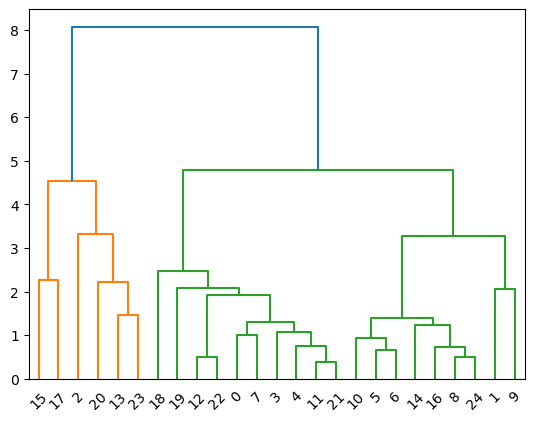

In [12]:
# create dendrogram
dendrogram = sch.dendrogram(dm)

In [13]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, metric= 'euclidean', linkage = 'complete')
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=3)

In [14]:
hc.labels_

array([2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2,
       2, 0, 1], dtype=int64)

In [15]:
Univ['h_clusterid'] = hc.labels_

In [16]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [17]:
Univ1=Univ.sort_values("h_clusterid")
Univ1.iloc[:,[0,-1]]

,Univ,h_clusterid
17,TexasA&M,0
15,Purdue,0
2,CMU,0
13,PennState,0
23,UWisconsin,0
20,UMichigan,0
14,Princeton,1
10,MIT,1
9,JohnsHopkins,1
24,Yale,1


In [18]:
Univ.iloc[:,1:].groupby(['h_clusterid']).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
h_clusterid,,,,,,
0,1114.333333,47.000000,67.833333,17.000000,13384.666667,74.000000
1,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
2,1271.000000,81.500000,35.400000,12.900000,23380.000000,89.400000


# Practice